In [1]:
import matplotlib.pyplot as plt
plt.style.use(['science','ieee'])
import numpy as np
import pandas as pd
import datetime as dt
import scipy.fftpack
from scipy.stats import pearsonr

import bezpy

import models
import plotlib

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


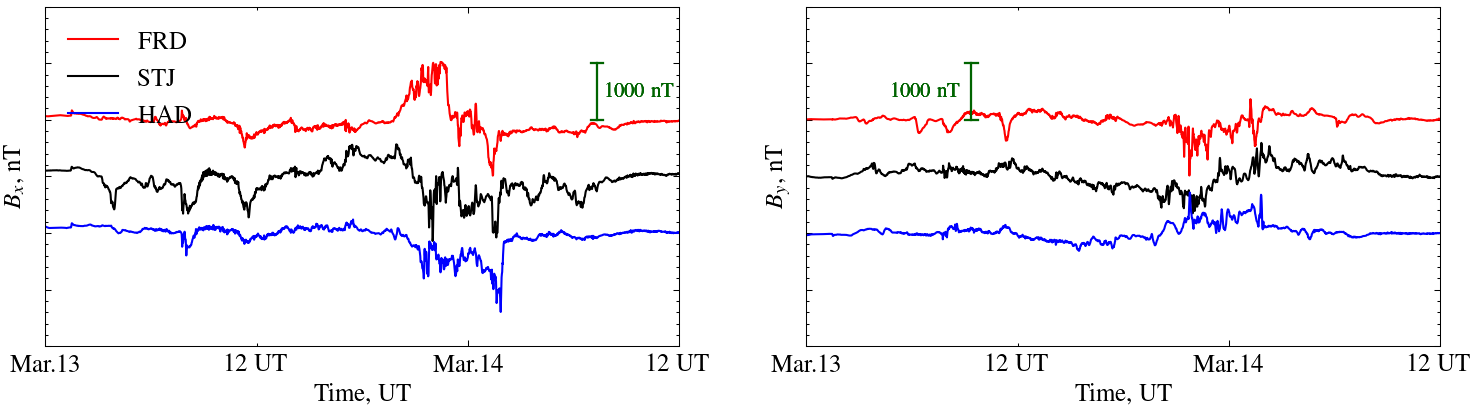

In [2]:
# Figure showing B field variations
stns, coords = ["FRD", "STJ", "HAD"], ["XYZ", "XYZ", "HDZ"]
db="data/{year}/"
dates, frames = [dt.datetime(1989,3,12),dt.datetime(1989,3,13),dt.datetime(1989,3,14)], {}
for stn, coord in zip(stns, coords):
    o = pd.DataFrame()
    for d in dates:
        f = db.format(year=d.year) + "{stn}_{date}_{coord}.txt".format(stn=stn, 
                                                                       date=d.strftime("%Y%m%d"), 
                                                                       coord=coord)
        o = pd.concat([o, bezpy.mag.read_iaga(f)])
    frames[stn] = o
plotlib.plot_xy_magnetic_field_oneplot(stns, frames)

In [3]:
efieldlist, stnlist, txns = [], [], []
for b, c in zip(range(1,10), ["XYZ"]*7 + ["HDZ"]*2):
    bf = models.BFieldAnalysis([dt.datetime(1989,3,12),dt.datetime(1989,3,13),
                                dt.datetime(1989,3,14)], b, coord=c, plot=False)
    bf.compute_Et()
    efieldlist.append(bf.E_frame)
    stnlist.append(bf.stn)
    txns.append(bf.om)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


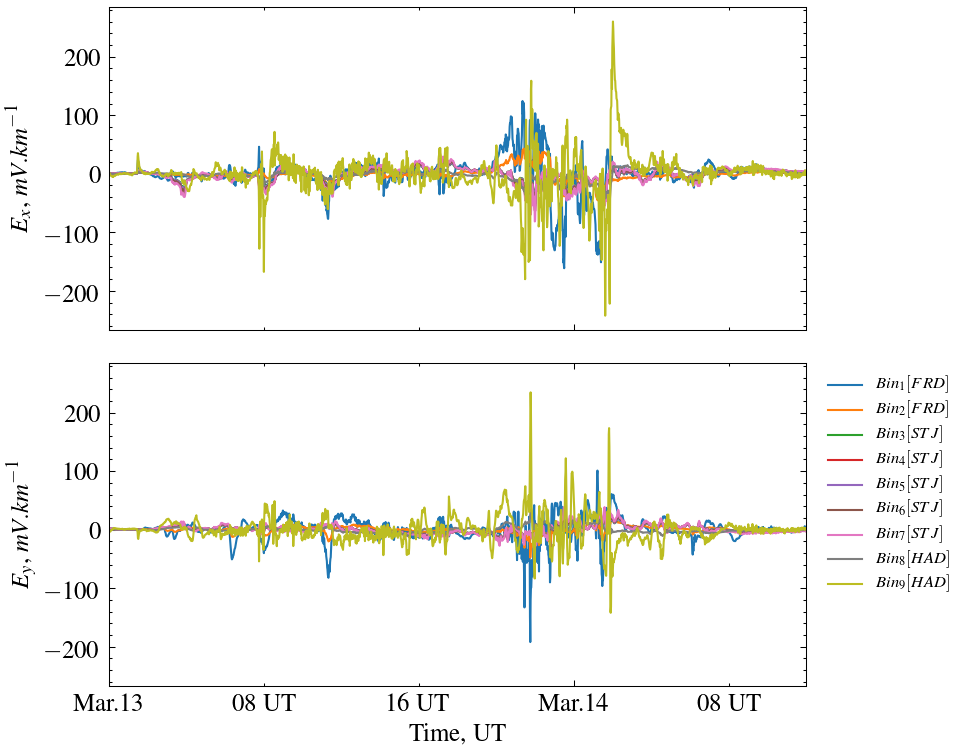

In [4]:
plotlib.plot_xy_electric_field(stnlist, efieldlist)

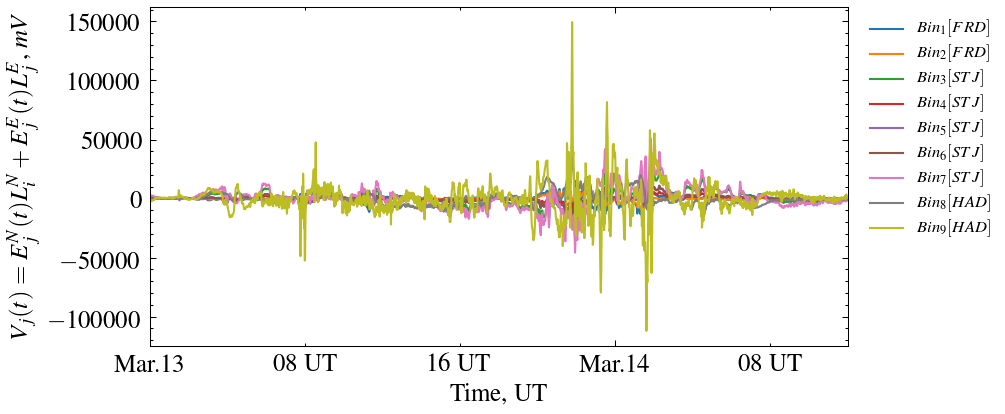

In [5]:
plotlib.plot_induced_potential(stnlist, efieldlist)

/home/shibaji/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/shibaji/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/shibaji/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/shibaji/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/shibaji/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=

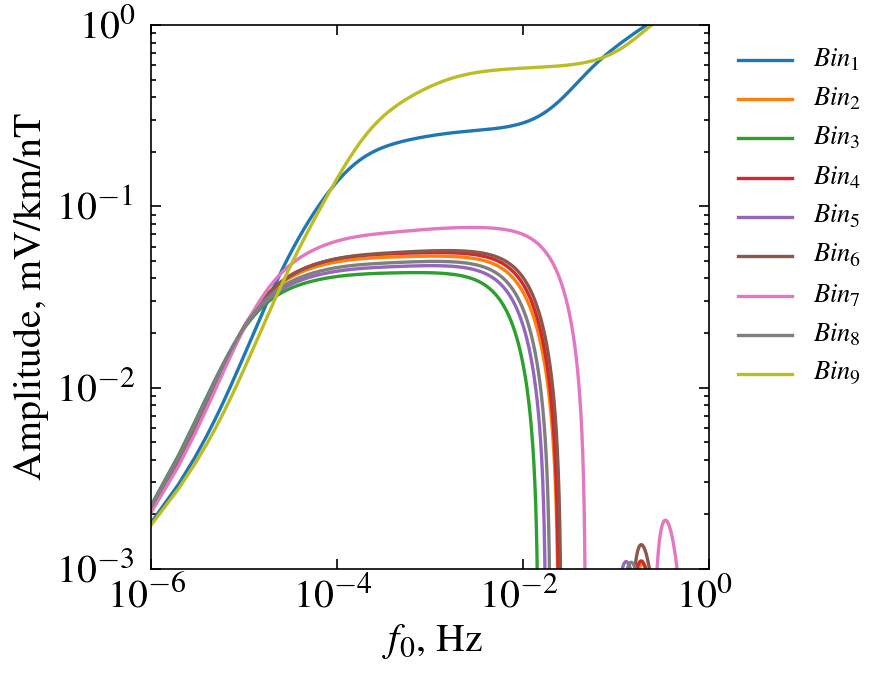

In [6]:
flim = [1e-6, 1e-0]
frqs = np.linspace(flim[0], flim[1], int(flim[1]/flim[0])+1)
fig = plt.figure(dpi=240, figsize=(3,3))
ax = fig.add_subplot(111)
ax.set_ylabel("Amplitude, mV/km/nT")
ax.set_xlabel(r"$f_0$, Hz")
ax.set_xlim(flim)
ax.set_ylim(1e-3, 1e0)

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
for i in range(9):
    tx = txns[i].get_TFs(freqs=frqs)
    txt = r"$Bin_%d$"%(i+1)
    ax.loglog(tx.freq, tx.Ef2Bs, color=colors[i], ls="-", lw=1., label=txt)
_ = ax.legend(bbox_to_anchor=(1.01, 1), loc="upper left", fontsize=8)